In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3) where 10 output neurons is for 10 classes of clothing
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4986 - accuracy: 0.8237
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3732 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3369 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3127 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2949 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2795 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2662 - accuracy: 0.9016
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2583 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2469 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3400 - accuracy: 0.8825
Test accuracy: 0.8824999928474426


In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Pick a number: 17
1/1 [==============================] - 0s 35ms/step
Coat
Pullover


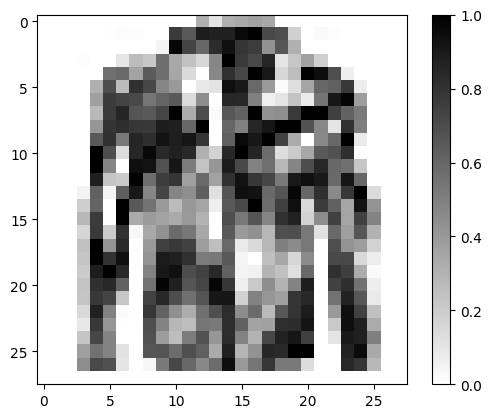

In [13]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  print(label)
  print(guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)